# Meaning Preservation

### Load data

In [1]:
import pandas as pd

textcomplexity = pd.read_csv('../data/textcomplexityde.csv', encoding='cp1252')
leichtesprache = pd.read_csv('../data/leichtesprache2.csv', encoding='cp1252', sep=";")

## Meaning Preservation score 
Based on sentence alignment + BERTScore similarities

In [ ]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '')))

from bert_score import BERTScorer
from reward.meaning_preservation import TextSimilarity

# Load score
bert_scorer = BERTScorer("dbmdz/bert-base-german-cased", num_layers=5)
text_sim = TextSimilarity(bert_scorer)

Example with printing

In [3]:
text_sim.score([textcomplexity['Complex'][6]], [textcomplexity['Simplification'][6]], printing=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 40.00it/s]



 Original:  Seit einigen Jahren finden Rasiermesser jedoch auch zunehmend im Privatbereich wieder eine wachsende Verwendung.
Simplification:  Seit einigen Jahren werden auch zuhause öfter Rasiermesser benutzt.
Value:  tensor(0.7953, device='cuda:0')

 Original:  Die Klinge muss vor jeder Rasur auf einem Streichriemen abgeledert und in regelmäßigen Abständen nachgeschliffen werden, um die Schärfe der Schneide zu erhalten.
Simplification:  Die Klinge muss vor jeder Rasur auf einem Lederriemen abgestrichen werden.
Value:  tensor(0.8454, device='cuda:0')

 Original:  Die Klinge muss vor jeder Rasur auf einem Streichriemen abgeledert und in regelmäßigen Abständen nachgeschliffen werden, um die Schärfe der Schneide zu erhalten.
Simplification:  In  regelmäßigen Abständen muss die Klinge nachgeschliffen werden, damit sie scharf bleibt.
Value:  tensor(0.7837, device='cuda:0')

 Original:  Die Existenz von Barbieren ist durch Grabszenen belegt, so etwa im Grab des Userhet (KV45), eines hohen B

[0.9076742246037437]

### Calculate Meaning Preservation Score for TC and LS

In [ ]:
text_sim_scores_tc =  text_sim.score(textcomplexity['Complex'], textcomplexity['Simplification'])
text_sim_scores_ls =  text_sim.score(leichtesprache['Complex'], leichtesprache['Simplification'])

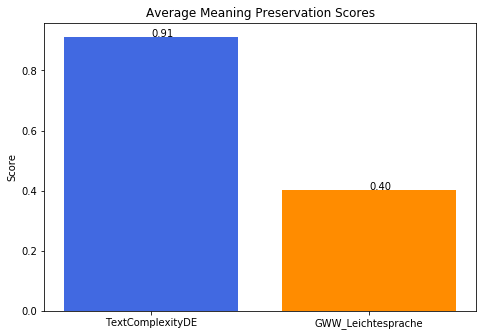

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(0, np.mean(text_sim_scores_tc), color = 'royalblue', width = 0.8)
ax.bar(1, np.mean(text_sim_scores_ls), color = 'darkorange', width = 0.8)
ax.set_ylabel('Score')
ax.set_title('Average Meaning Preservation Scores')
ax.set_xticks([0, 1])
ax.set_xticklabels(["TextComplexityDE", "GWW_Leichtesprache"])

plt.text(0, np.mean(text_sim_scores_tc), "%.2f" % np.mean(text_sim_scores_tc))
plt.text(1, np.mean(text_sim_scores_ls), "%.2f" % np.mean(text_sim_scores_ls))

plt.show()